In [275]:
import pandas as pd
import matplotlib.pyplot as plt

In [276]:
df = pd.read_csv("space_missions.csv",encoding='latin-1')
df.head()

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
0,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-10-04,19:28:00,Sputnik 8K71PS,Sputnik-1,Retired,NaN,Success
1,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1957-11-03,02:30:00,Sputnik 8K71PS,Sputnik-2,Retired,NaN,Success
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,16:44:00,Vanguard,Vanguard TV3,Retired,NaN,Failure
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,03:48:00,Juno I,Explorer 1,Retired,NaN,Success
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,07:33:00,Vanguard,Vanguard TV3BU,Retired,NaN,Failure


In [277]:
df["datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("datetime", inplace=True)


In [278]:
# How have rocket launches trended across time?

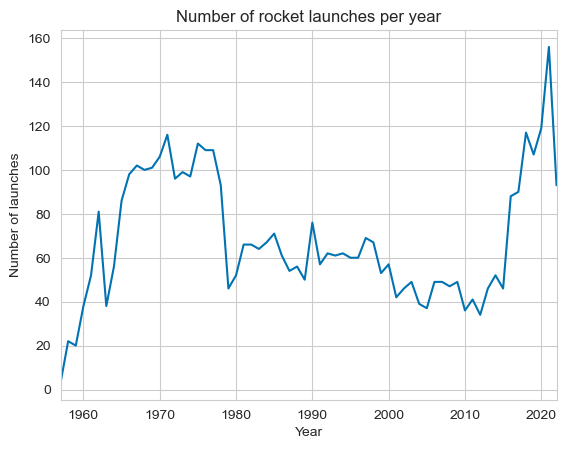

In [285]:
df.resample("Y")["Rocket"].count().plot()
plt.title("Number of rocket launches per year")
plt.xlabel("Year")
plt.ylabel("Number of launches")
plt.show()

In [244]:
# Has mission success rate increased?

In [286]:
success_rate = df.groupby(df.index.year)["MissionStatus"].apply(lambda x: (x == "Success").sum() / len(x))
success_rate.index = success_rate.index.dropna().astype(int)


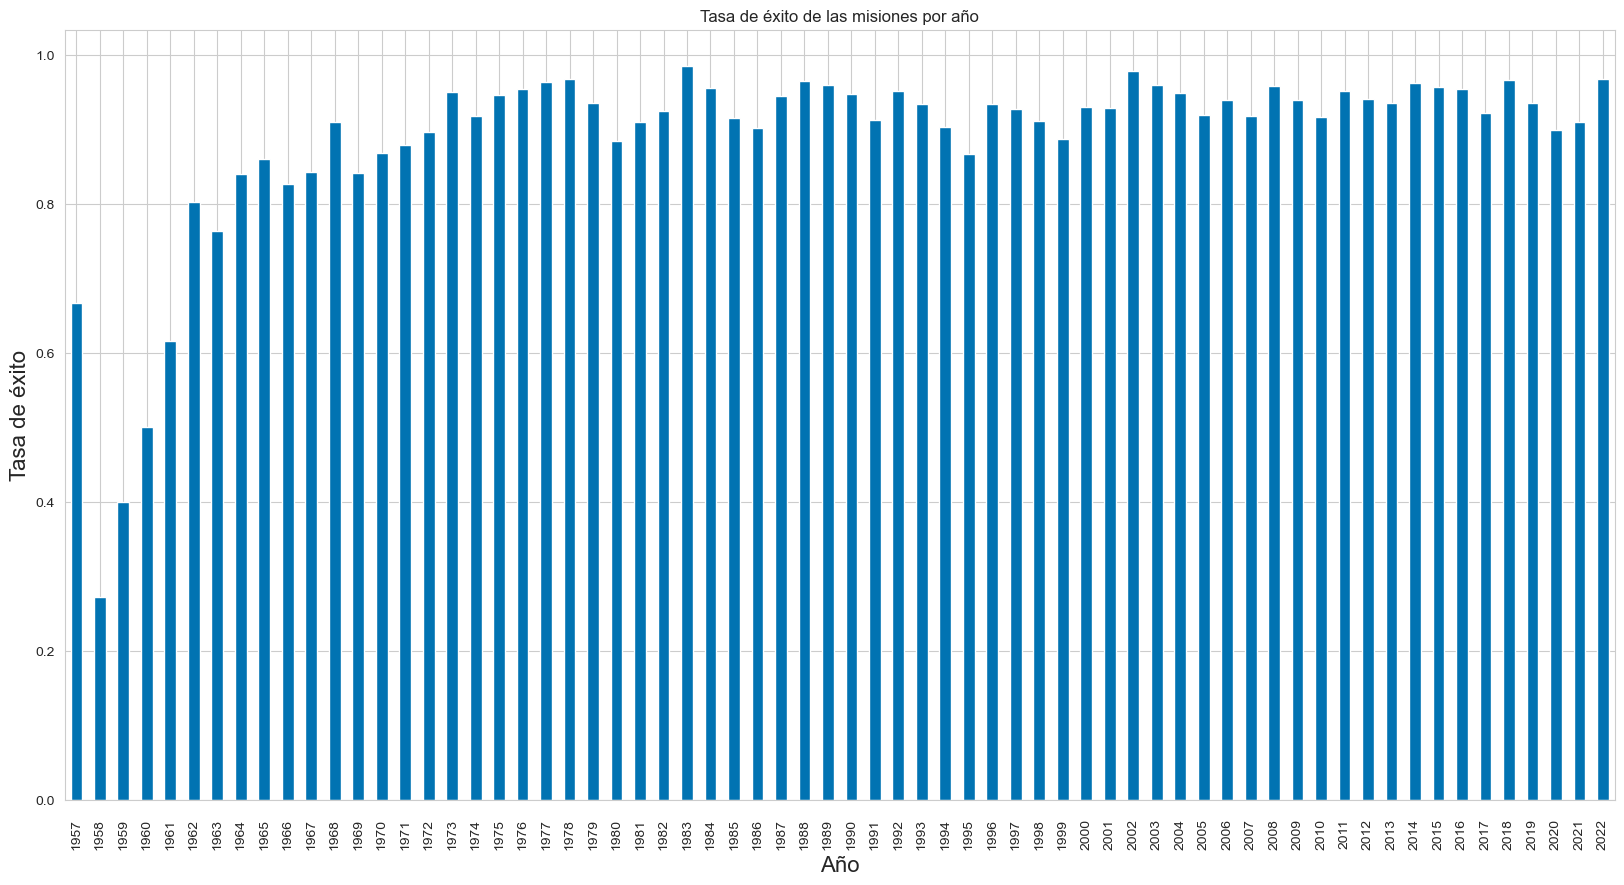

In [287]:
plt.figure(figsize=(20,10))  
success_rate.plot(kind="bar")
plt.title("Tasa de éxito de las misiones por año")
plt.xlabel("Año", fontsize=16)
plt.ylabel("Tasa de éxito", fontsize=16)
plt.xticks(range(len(success_rate.index)), success_rate.index, rotation=90)
plt.tick_params(axis="x", which="major", pad=10)  

In [288]:
df = pd.read_csv("space_missions.csv",encoding='latin-1')

In [289]:
# Which countries have had the most successful space missions?

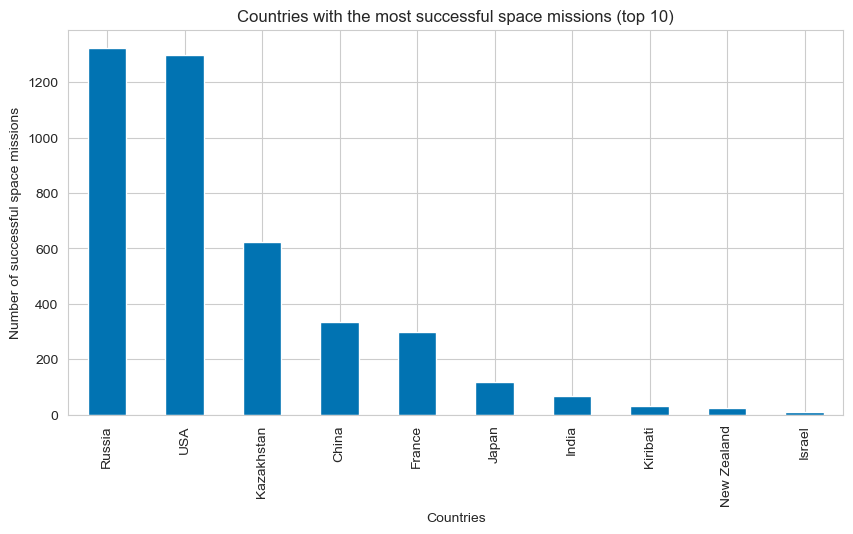

In [315]:
plt.figure(figsize=(10,5))
success_by_country = success_by_country.iloc[:10]
success_by_country.plot(kind="bar")
plt.title("Countries with the most successful space missions (top 10)")
plt.xlabel("Countries")
plt.ylabel("Number of successful space missions")
plt.show()

In [249]:
# Has it always been that way?

In [292]:
df["datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])
df.set_index("datetime", inplace=True)
df["Country"] = df["Location"].str.split(", ").str[-1]
df = df.replace("Pacific Ocean", "Kiribati")

In [293]:
last_10_years = df[df.index.year >= df.index.year.max() - 10]
successful_missions = last_10_years[last_10_years["MissionStatus"] == "Success"]
top_3_by_year = successful_missions.groupby(successful_missions.index.year)["Country"].apply(lambda x: x.value_counts().nlargest(3).index.tolist()).to_frame()
top_3_by_year = top_3_by_year["Country"].apply(pd.Series)

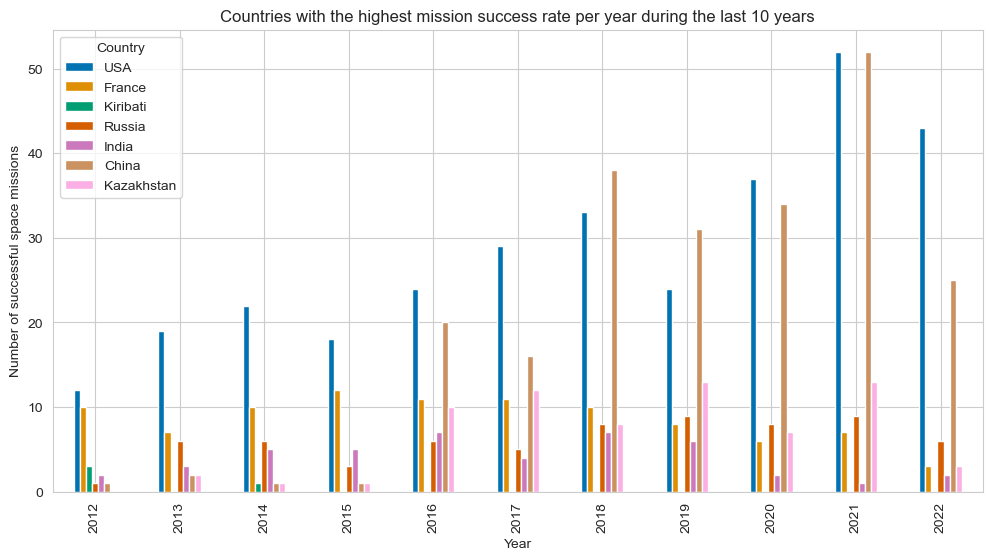

In [295]:
success_by_country_year = successful_missions.groupby(["Country", successful_missions.index.year])["MissionStatus"].count().unstack(level=0)
success_by_country_year = success_by_country_year[top_3_by_year.stack().unique()]
success_by_country_year.plot.bar(figsize=(12, 6))
plt.title("Countries with the highest mission success rate per year during the last 10 years")
plt.xlabel("Year")
plt.ylabel("Number of successful space missions")
plt.show()

In [252]:
# Which rocket has been used for the most space missions? Is it still active?

In [296]:
rocket_count = df["Rocket"].value_counts()

In [299]:
most_used_rocket = rocket_count.idxmax()
print(f"Most used rocket: {most_used_rocket}")

Most used rocket: Cosmos-3M (11K65M)


In [300]:
last_entry = df[df['Rocket'] == most_used_rocket].iloc[-1]
rocket_status = last_entry['RocketStatus']
print(f"The status of the rocket {most_used_rocket} is: {rocket_status}")

The status of the rocket Cosmos-3M (11K65M) is: Retired


In [256]:
# Are there any patterns you can notice with the launch locations?
#
# I could check which countries have a better ratio of successful missions

In [301]:
grouped = df.groupby("Country")

In [302]:
distinct_values = df["MissionStatus"].unique()

In [304]:
df["Country"] = df["Location"].str.split(", ").str[-1]
df = df.replace("Pacific Ocean", "Kiribati")
country_counts = df["Country"].value_counts()

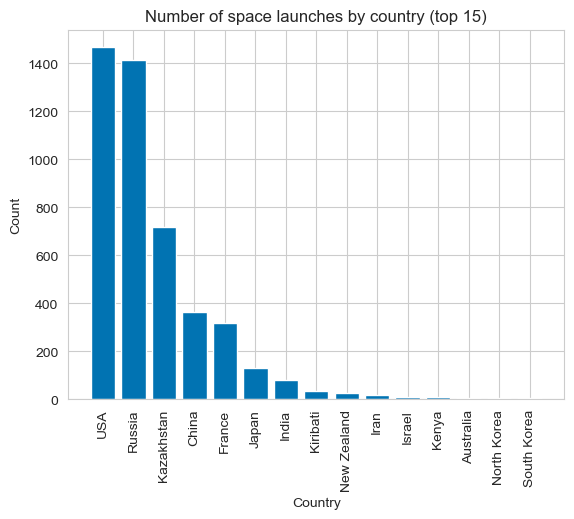

In [305]:
plt.bar(country_counts.index[:15], country_counts.values[:15])
plt.xlabel("Country")
plt.ylabel("Count")
plt.title("Number of space launches by country (top 15)")
plt.xticks(rotation=90)
plt.show()

In [306]:
total_by_country = df.groupby("Country")["MissionStatus"].count()

In [307]:
success_percentage_by_country = (success_by_country / total_by_country) * 100
success_percentage_by_country = success_percentage_by_country[success_percentage_by_country > 0]
success_percentage_by_country = success_percentage_by_country.sort_values(ascending=False)

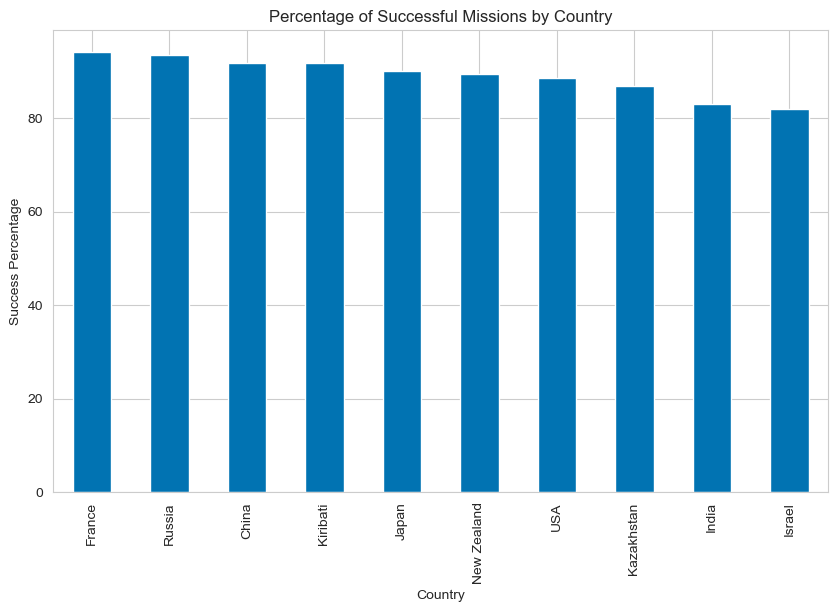

In [308]:
success_percentage_by_country.plot.bar(figsize=(10, 6))
plt.xlabel("Country")
plt.ylabel("Success Percentage")
plt.title("Percentage of Successful Missions by Country")
plt.show()

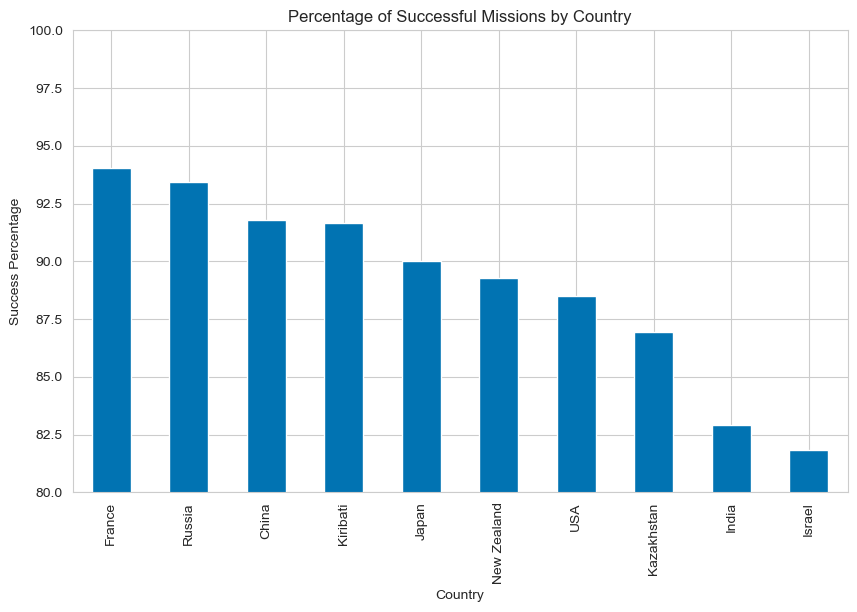

In [309]:
success_percentage_by_country.plot.bar(figsize=(10, 6))
plt.xlabel("Country")
plt.ylabel("Success Percentage")
plt.title("Percentage of Successful Missions by Country")
ax = plt.gca()
ax.set_ylim([80, 100])
plt.show()

In [310]:
# I can also visualize the approximate areas with the highest number of launches
# I use another dataset with the approximate latitudes and longitudes of each country

In [316]:
import folium
from folium.plugins import HeatMap
import numpy as np

In [317]:
df = pd.read_csv("space_missions.csv",encoding='latin-1')
locations = pd.read_csv("average-latitude-longitude-countries.csv")
locations = locations.replace("United States","USA")
locations = locations.replace('Russian Federation','Russia')
df["Country"] = df["Location"].str.split(", ").str[-1]
df = df.replace("Pacific Ocean", "Kiribati")
df = pd.merge(df, locations, on="Country", how="left")
df.fillna(0,inplace=True)

In [318]:
mission_count = df['Country'].value_counts()
df['MissionCount'] = df['Country'].map(mission_count)

In [319]:
mapa = folium.Map(location=[0, 0], zoom_start=2)

In [320]:
locations = df[df['MissionStatus'] == 'Success'][['Latitude', 'Longitude']].values.tolist()

In [321]:
heatmap_layer = folium.plugins.HeatMap(locations, min_opacity=0.2, radius=7, blur=3)
mapa.add_child(heatmap_layer)